# Linear Regression

In [1]:
import sys
import io
from io import StringIO
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import SGDRegressor

In [2]:
## Simple linear regression

### Dataset description and visualisation

<b>Student Hours & Scores: </b> In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

<div class="alert alert-block alert-warning"> 
- Is this task a multiple or a simple linear regression problem?
</div>

In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv("student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<div class="alert alert-block alert-warning"> 
- Which variable presents the dependent variable, and which one presents the independent variable?
</div>

<div class="alert alert-block alert-danger"> 
1. Print the number of samples and features in the dataset.
<div/>

In [4]:
print(f'number of samples is: {len(df)}')
print(f'number of features is: {len(df.columns)}')

number of samples is: 25
number of features is: 2


<div class="alert alert-block alert-danger"> 
2. Print the Information about the dataset features.
<div/>

In [5]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<div class="alert alert-block alert-danger"> 
3. Describe the features by printing their statistics.
<div/>

In [6]:
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


<div class="alert alert-block alert-danger"> 
3. Plot the data and observe whether it demonstrates linear separability.
<div/>

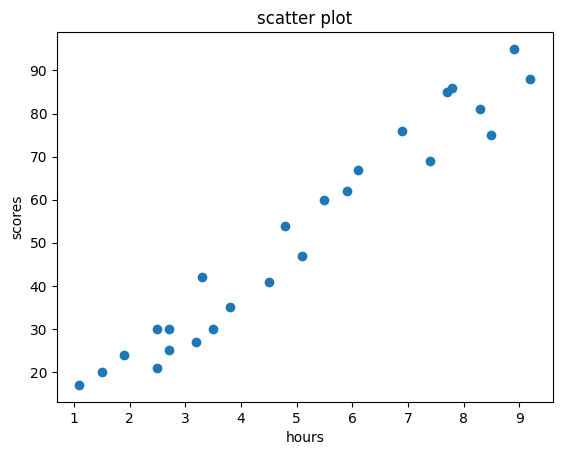

In [7]:
plt.scatter(df['Hours'], df['Scores'])
plt.title('scatter plot')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

### Dataset training and evaluation

#### Splitting the data into training and testing

In [8]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:1]
Y = df.iloc[:,-1]
x_train, x_test,y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=0) 

<div class="alert alert-block alert-danger">
    
5. Train the data using the LinearRegression module from sklearn.
6. 
Display the model's equation
   .7. 
Create a plot showing the data and the generated model.
<div/>

In [9]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_

array([9.91065648])

In [10]:
model.intercept_

2.0181600414346974

the equation for simple linear regression is: scores= a*(hours)+b where a is the coef_ (slope) and b is the intercept_

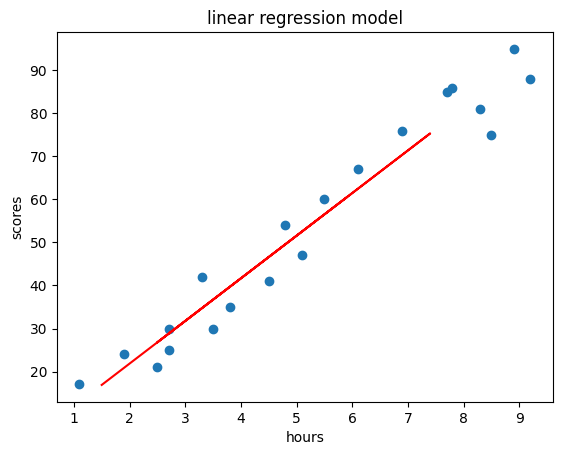

In [11]:
plt.scatter(x_train, y_train)
plt.plot(x_test, model.predict(x_test), color='red')
plt.title('linear regression model')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

<div class="alert alert-block alert-danger">
    
8. Print the performance of the generated model on the training and the test set, based on the following metrics: MAE, MSE, RMSE, and R square. Does the generated model present an  overfitting problem?
9. Describe the R square metric and its advantages compared to the other metrics.
10. Is the generated model characterized by a good performance?
11. Create a plot visualizing the difference between actual and predicted values.

<div/>

In [12]:
prediction = model.predict(x_test)
mae= mean_absolute_error(y_test, prediction)
mse= mean_squared_error(y_test, prediction)
rmse= np.sqrt(mse)
r_square= r2_score(y_test, prediction)

print(f'mae is: {mae}')
print(f'mse is: {mse}')
print(f'rmse is: {rmse}')
print(f'r² is: {r_square}')

mae is: 4.183859899002975
mse is: 21.598769307217406
rmse is: 4.647447612100367
r² is: 0.9454906892105355


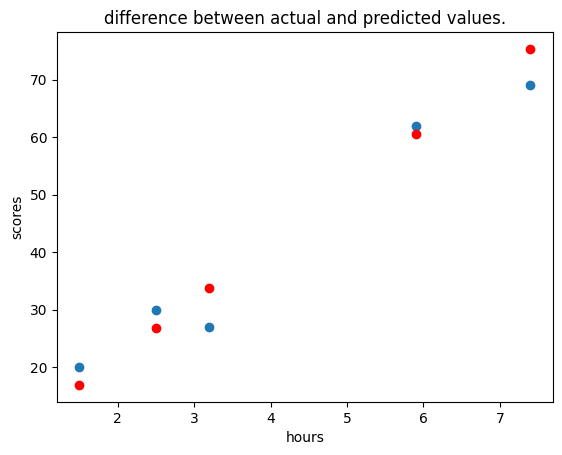

In [13]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, model.predict(x_test), color='red')
plt.title('difference between actual and predicted values.')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

## Multiple linear regression

### Dataset description and analysis

<b> The Boston Housing Dataset: </b> the Boston Housing Dataset is derived from information collected by the U.S. Census Service regarding housing in the Boston, Massachusetts area. It aims to predict house prices based on various characteristics. 

In [14]:
df = pd.read_csv("HousingData.csv")
print(df.head())
print(df.shape)
print(df.info())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO   
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3  \
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null

<div class="alert alert-block alert-danger">
    
1. Print the correlation matrix, and select only the highly correlated features with the label (MEDV feature).
2. Verify for each selected feature if the values are linearly separable by using MEDV as a target variable.
3. Normalize data (not the label) by using the min_max_scaler strategy.

<div/>

In [15]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


we notice that the columns: RM and LSTAT re hightly correlated with MEDV

In [16]:
df2 = df.drop(columns=['RM', 'LSTAT'], inplace=False)
print(df2.columns)
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'MEDV'],
      dtype='object')
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


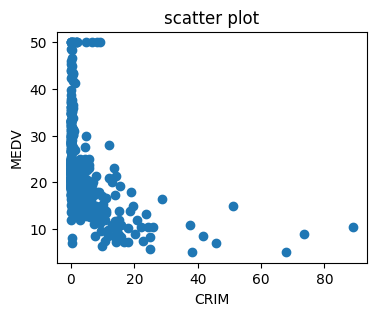

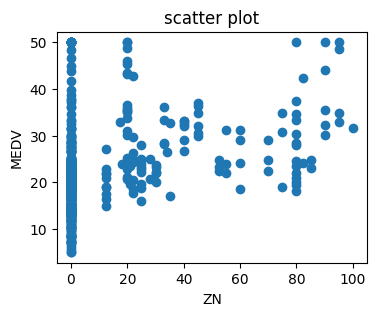

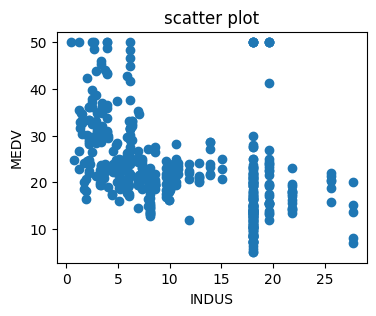

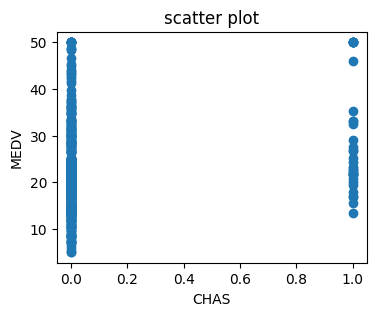

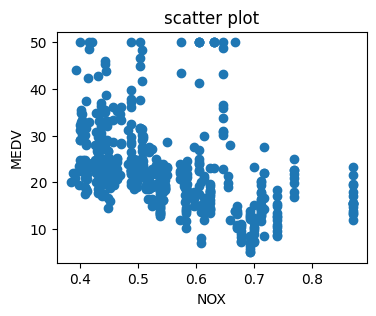

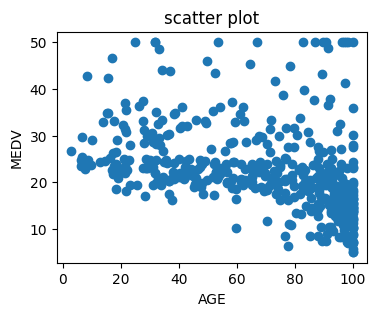

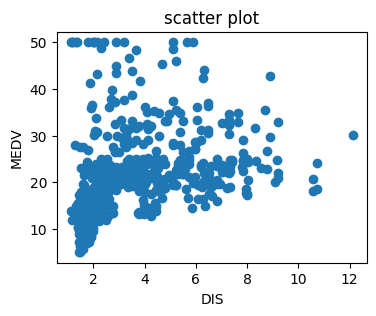

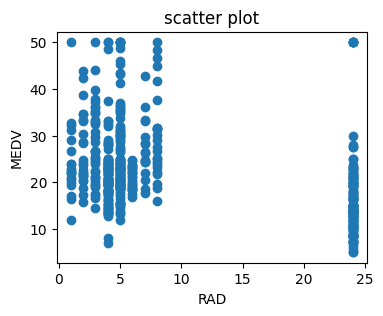

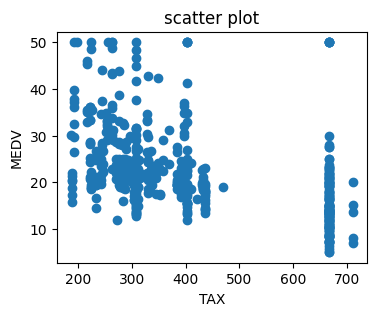

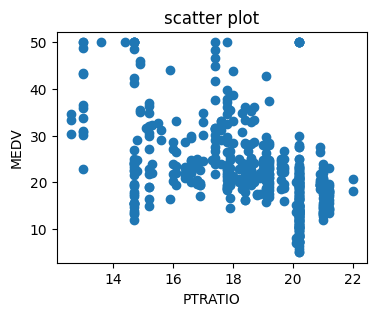

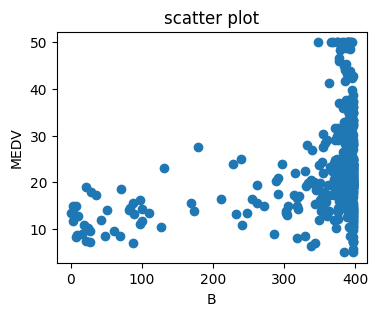

In [17]:
for feature in df2.columns[:-1]: 
    plt.figure(figsize=(4, 3))
    plt.scatter(df2[feature], df2['MEDV'], label=feature)
    plt.title('scatter plot')
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.show()

we notice that the data is not linearly separable therefore we need multiple linear regression

In [18]:
df2.isna().sum()


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
MEDV        0
dtype: int64

In [19]:
for feature in df2.columns:
    df2[feature] = df2[feature].fillna(df2[feature].mean())
df2.isna().sum()    

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
MEDV       0
dtype: int64

#### Split the generated dataset

In [20]:
X = df2.iloc[:, :-1]
Y = df2.iloc[:,-1]
X = scale(X)
Y = scale(Y)
x_train, x_test,y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [21]:
from sklearn.linear_model import SGDRegressor


<div class="alert alert-block alert-danger">
    
4. SGD is an iterative stochastic optimization technique. Print the convergence graph of the trained model ( x presents the iterations and y is the loss).
<div/>

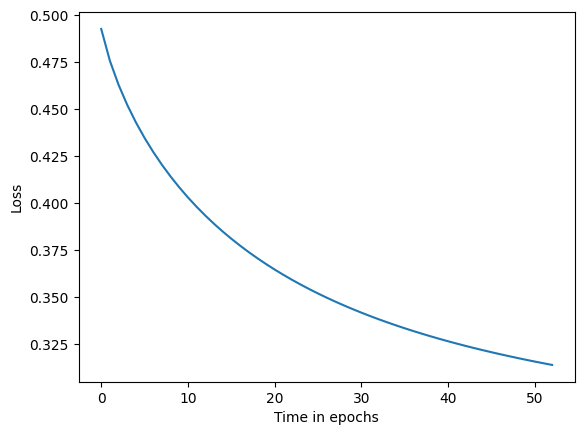

In [22]:
def PlotConvergence(lr):
    sgdr = SGDRegressor(learning_rate='invscaling', eta0=lr,max_iter=1000,verbose=1)
    old_stdout = sys.stdout
    sys.stdout = mystdout = StringIO()
    sgdr.fit(x_train, y_train)
    sys.stdout = old_stdout
    loss_history = mystdout.getvalue()
    loss_list = []
    for line in loss_history.split('\n'):
        if(len(line.split("loss: ")) == 1):
            continue
        loss_list.append(float(line.split("loss: ")[-1]))
    plt.figure()
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.xlabel("Time in epochs"); plt.ylabel("Loss")
    plt.show()
PlotConvergence(0.0001)

![title](convergence.png)

<div class="alert alert-block alert-danger">
    
5. Vary in the learning rate value (0.01,0.001,0.0001). By comparing the convergence graphs for each model, what do you observe in terms of convergence and results?
6. Why the graph does not reach the maximum number of iterations when using the 0.01 learning rate? which variable controls this.
7. Predict the class of the following sample.
     
<div/>

<Figure size 400x300 with 0 Axes>

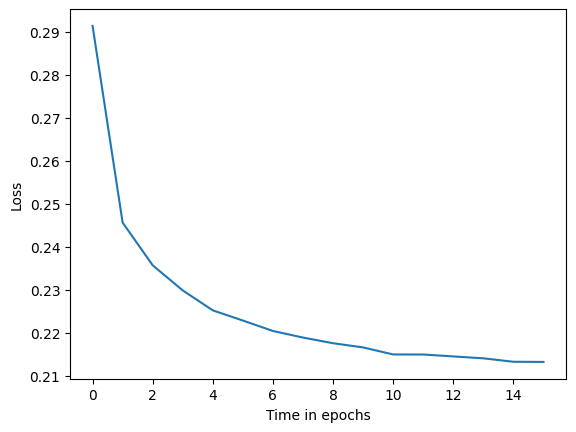

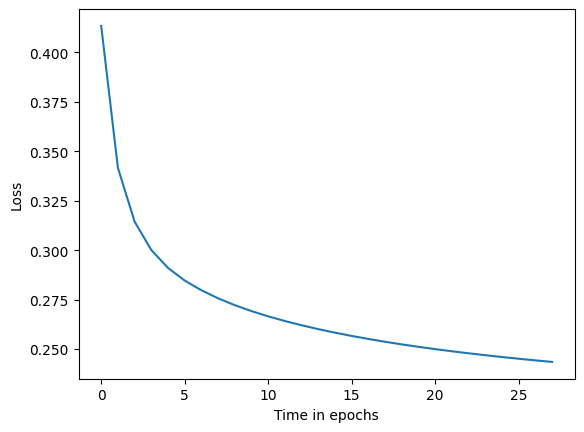

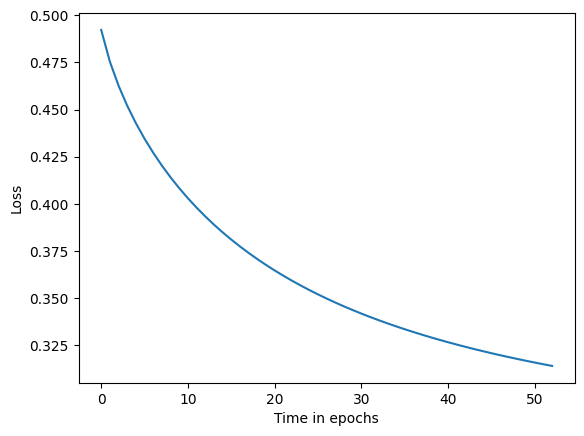

In [23]:
plt.figure(figsize=(4,3))
PlotConvergence(0.01)
PlotConvergence(0.001)
PlotConvergence(0.0001)

![title](sample.png)

the variable responsible for not reaching the max iteration is tol (tolerance) by default it's 1e-3

In [24]:
model = SGDRegressor(learning_rate='invscaling', eta0=0.01,max_iter=1000,verbose=1)
model.fit(x_train,y_train)
sample= scale([1.13081,
   0.00000,
   8.14000,
   0.00000,
   0.53800,
   94.10000,
   4.23300,
   4.00000,
   307.00000,
   21.00000,
   360.17000
  ])
sample = sample.reshape(1, -1)
model.predict(sample)


-- Epoch 1
Norm: 0.38, NNZs: 11, Bias: 0.006738, T: 404, Avg. loss: 0.288301
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 11, Bias: 0.003682, T: 808, Avg. loss: 0.245714
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.53, NNZs: 11, Bias: 0.002684, T: 1212, Avg. loss: 0.235017
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.57, NNZs: 11, Bias: 0.003619, T: 1616, Avg. loss: 0.228773
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 11, Bias: 0.003507, T: 2020, Avg. loss: 0.224822
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.63, NNZs: 11, Bias: 0.007081, T: 2424, Avg. loss: 0.222380
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.65, NNZs: 11, Bias: 0.007652, T: 2828, Avg. loss: 0.220096
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.67, NNZs: 11, Bias: 0.005800, T: 3232, Avg. loss: 0.218749
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.69, NNZs: 11, Bias: 0.004139, T: 3636, Avg. loss: 0.216976
Total training time:

array([0.52167925])

In [29]:
model = SGDRegressor(learning_rate='invscaling', eta0=0.01,max_iter=1000,verbose=1, tol=0.00000000000000000000000000000001)
model.fit(x_train,y_train)
sample= scale([1.13081,
   0.00000,
   8.14000,
   0.00000,
   0.53800,
   94.10000,
   4.23300,
   4.00000,
   307.00000,
   21.00000,
   360.17000
  ])
sample = sample.reshape(1, -1)
model.predict(sample)

-- Epoch 1
Norm: 0.41, NNZs: 11, Bias: -0.006089, T: 404, Avg. loss: 0.289752
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.46, NNZs: 11, Bias: -0.006156, T: 808, Avg. loss: 0.246603
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.54, NNZs: 11, Bias: -0.001356, T: 1212, Avg. loss: 0.235463
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.56, NNZs: 11, Bias: 0.001423, T: 1616, Avg. loss: 0.229222
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 11, Bias: 0.000562, T: 2020, Avg. loss: 0.225153
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.62, NNZs: 11, Bias: -0.001351, T: 2424, Avg. loss: 0.222365
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.65, NNZs: 11, Bias: 0.001215, T: 2828, Avg. loss: 0.220142
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.67, NNZs: 11, Bias: -0.001228, T: 3232, Avg. loss: 0.218485
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.69, NNZs: 11, Bias: -0.000073, T: 3636, Avg. loss: 0.217688
Total training

array([0.41492733])